# Applied Data Science
## Assignment-2

Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding 
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
 One of the reasons that the shipwreck led to such loss of life was that there were not 
enough lifeboats for the passengers and crew.
 Although there was some element of luck involved in surviving the sinking, some groups of 
people were more likely to survive than others, such as women, children, and the upperclass.
The problem associated with the Titanic dataset is to predict whether a passenger survived the 
disaster or not. The dataset contains various features such as passenger class, age, gender, 
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can 
be used to build a predictive model to determine the likelihood of a passenger surviving the 
disaster. The dataset offers opportunities for feature engineering, data visualization, and model 
selection, making it a valuable resource for developing and testing data analysis and machine 
learning skills.
Perform Below Tasks to complete the assignment:

1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations.
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Load the dataset.

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##### Perform Below Visualizations. 
###### ● Univariate Analysis

In [4]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

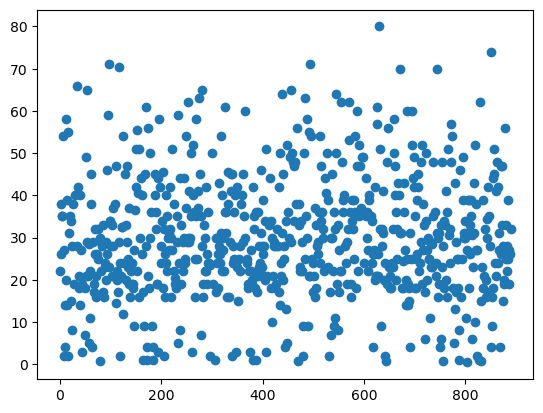

In [5]:
plt.scatter(df.index,df['age'])
plt.show

<Axes: ylabel='age'>

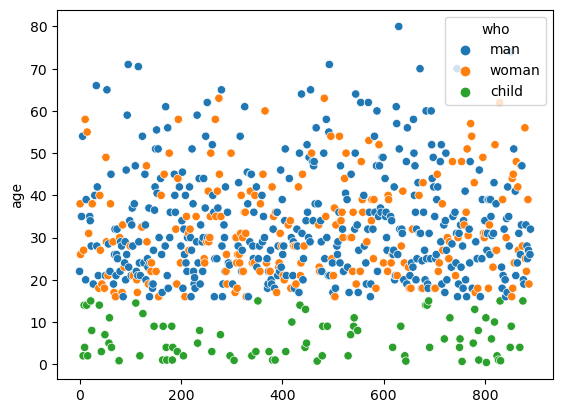

In [6]:
sns.scatterplot(x = df.index, y=df['age'],hue=df['who'])

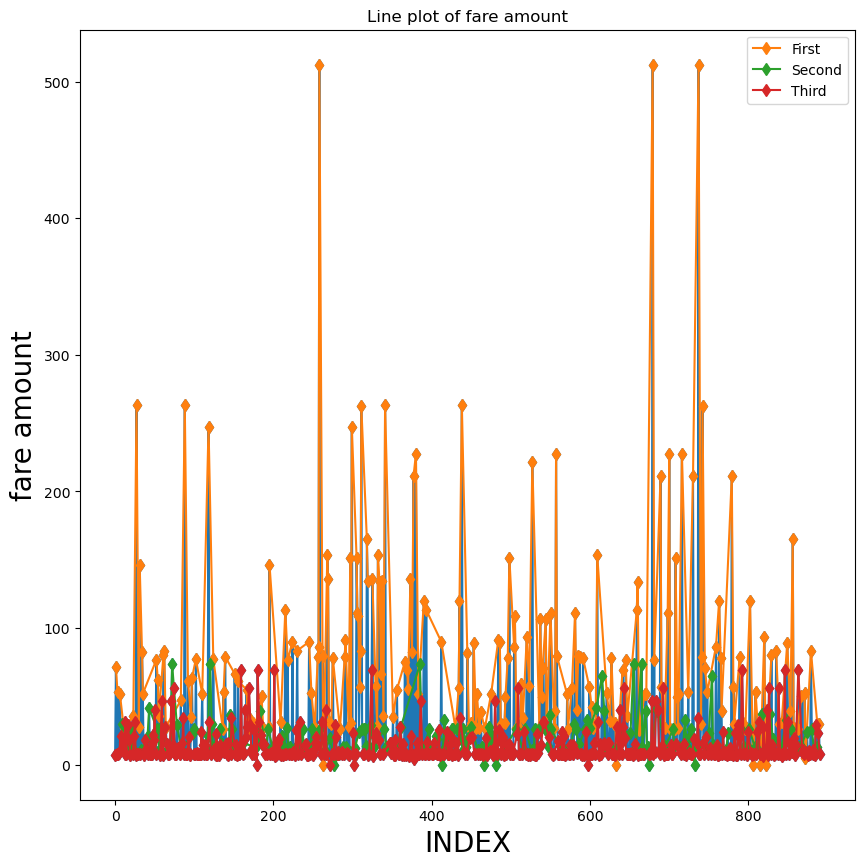

In [7]:
plt.figure(figsize=(10,10))
plt.title('Line plot of fare amount')
plt.xlabel('INDEX',fontsize=20)
plt.ylabel('fare amount',fontsize=20)
plt.plot(df.index,df['fare'],marker='d')
for name,group in df.groupby('class'):
    plt.plot(group.index,group['fare'],label=name,marker='d')
plt.legend()
plt.show()

(array([491.,   0.,   0.,   0.,   0., 216.,   0.,   0.,   0., 184.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

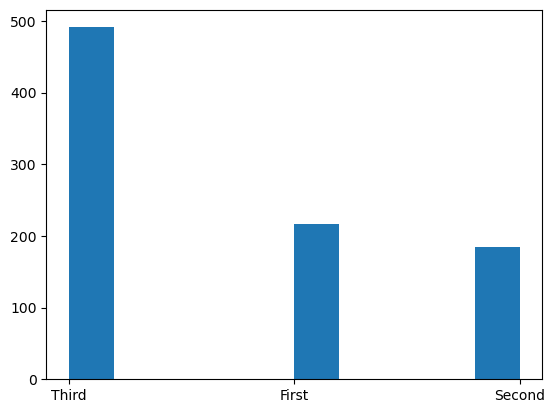

In [8]:
plt.hist(df['class'])

([<matplotlib.patches.Wedge at 0x1c0c4fd9210>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Alive'),
  Text(0.3925750313068116, -1.0275625746369201, 'Not Alive')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

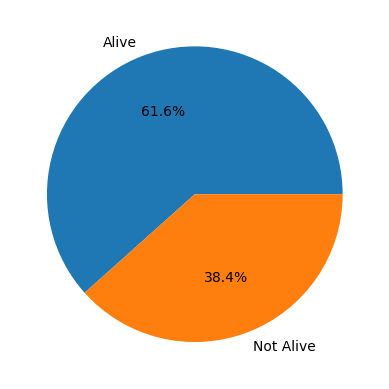

In [9]:
plt.pie(df.alive.value_counts(),labels=['Alive','Not Alive'],autopct='%.1f%%')

<Axes: >

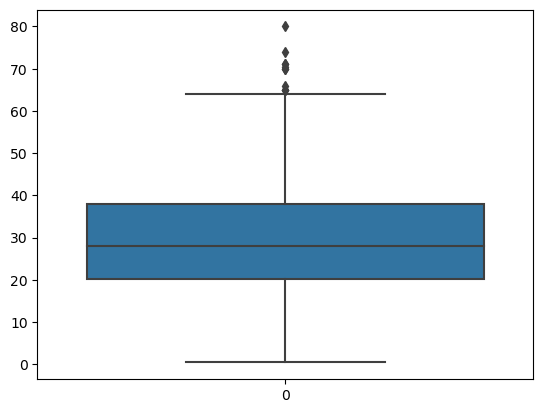

In [10]:
sns.boxplot(df['age'])

######  ● Bi - Variate Analysis

<Axes: xlabel='age', ylabel='fare'>

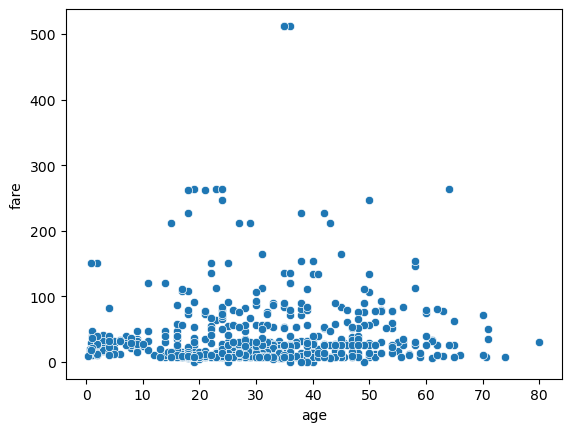

In [11]:
sns.scatterplot(x = df['age'], y=df['fare'])

<Axes: xlabel='alive', ylabel='count'>

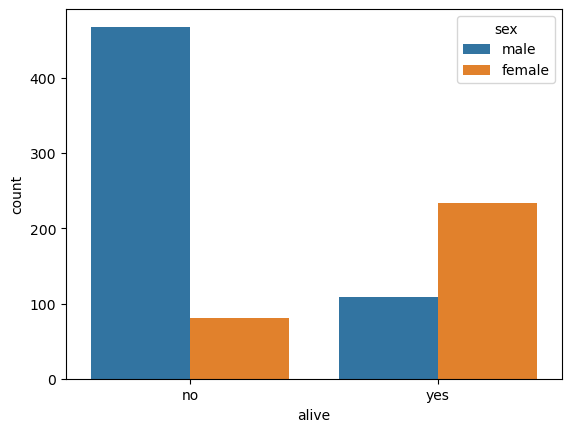

In [12]:
sns.countplot(data=df,x='alive',hue='sex')

<Axes: xlabel='age', ylabel='Density'>

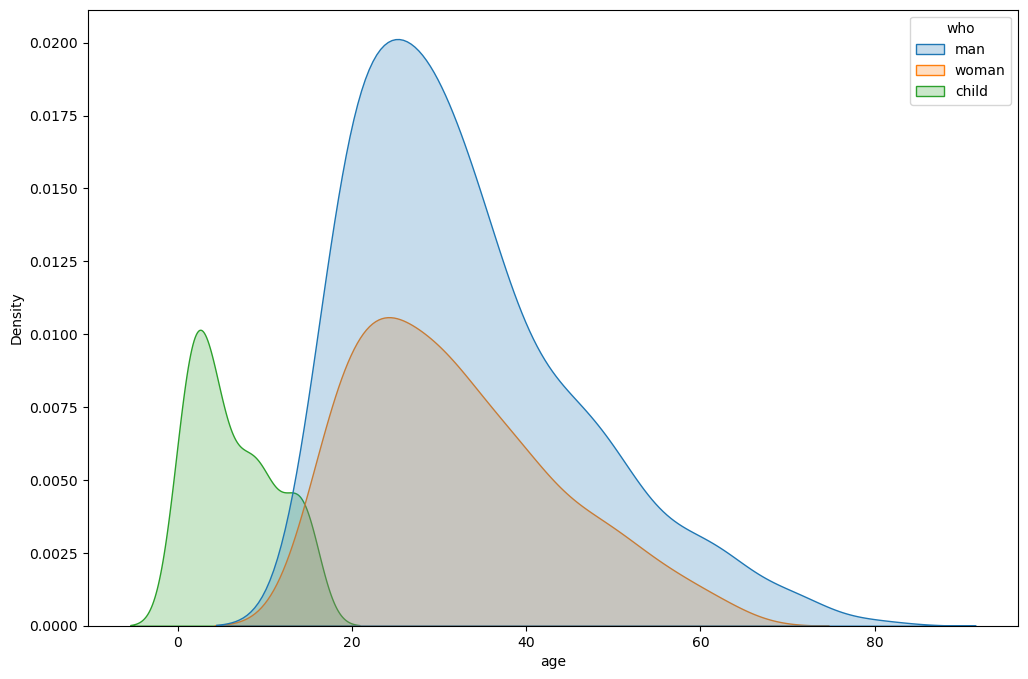

In [13]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,x='age',hue='who',fill=True)

###### ● Multi - Variate Analysis

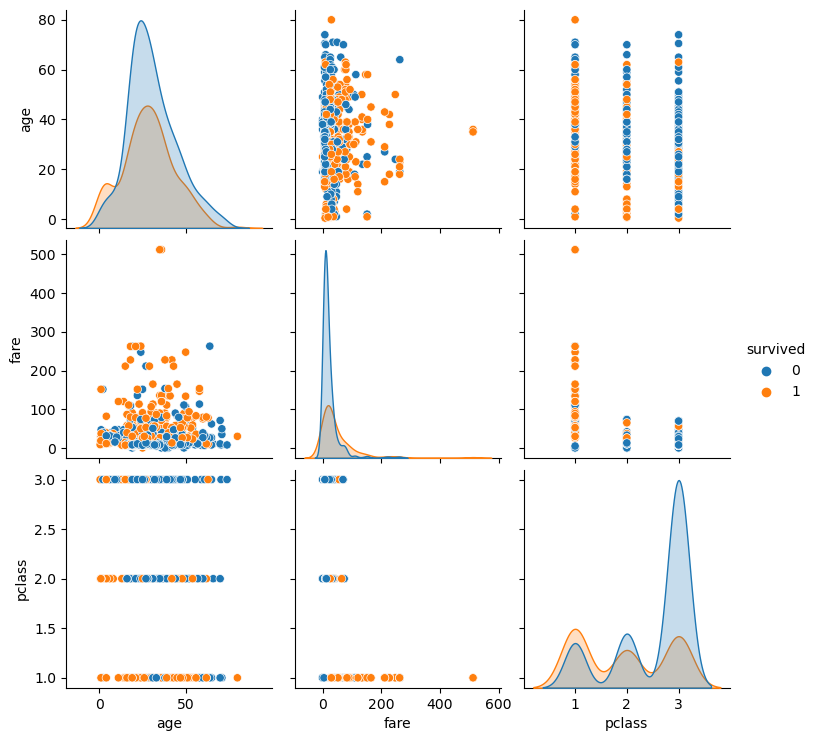

In [14]:
sns.pairplot(data=df[['age','fare','survived','sex','pclass']],hue='survived')

##### Perform descriptive statistics on the dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [16]:
df.mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29940\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [17]:
df.median()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29940\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [18]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [19]:
df.skew()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29940\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

In [20]:
# kurtosis
df.kurt()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29940\3536932851.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

In [21]:
df.max()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29940\1151452817.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


survived             1
pclass               3
sex               male
age               80.0
sibsp                8
parch                6
fare          512.3292
class            Third
who              woman
adult_male        True
alive              yes
alone             True
dtype: object

In [22]:
df.min()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29940\3962516015.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


survived           0
pclass             1
sex           female
age             0.42
sibsp              0
parch              0
fare             0.0
class          First
who            child
adult_male     False
alive             no
alone          False
dtype: object

In [23]:
df.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

###### Handle the Missing values.

In [24]:
df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [26]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
df['age'].fillna(df['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [28]:
df.drop(['deck'], axis=1, inplace=True)

In [29]:
df['embarked'].fillna(df['embarked'].mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [30]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode())

In [31]:
categories = {"female": 1, "male": 0}
df['sex']= df['sex'].map(categories)

prepared_df = pd.concat([df, pd.get_dummies(df['embarked'],drop_first=True)], axis=1) 

prepared_df.drop(['embarked'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29940\2475478975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = prepared_df.corr()


<Axes: >

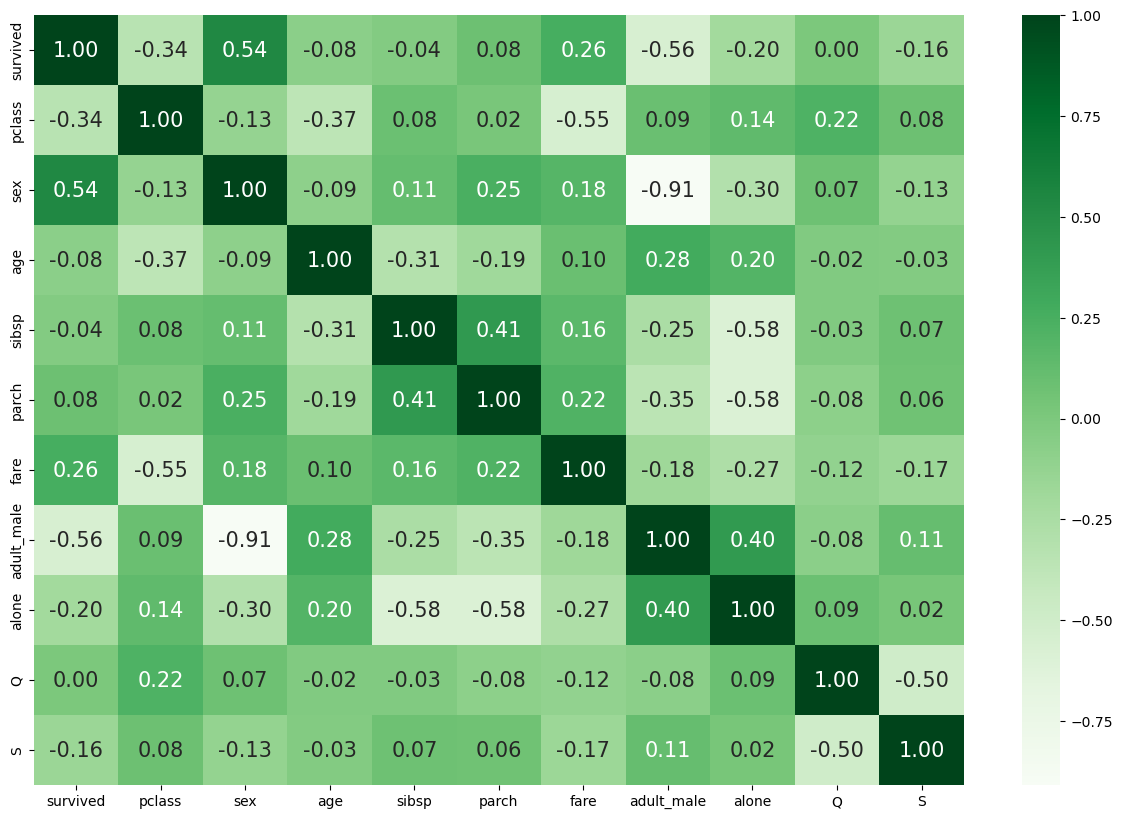

In [32]:
corr = prepared_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [34]:
X = prepared_df.drop(['survived'], axis=1)
y = prepared_df['survived']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)